In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
df_trans=pd.read_csv('transactions.csv')
df_custadd=pd.read_csv('CustomerAdress.csv')
df_custdemo=pd.read_csv('CustomerDemographic.csv')

In [3]:
df_trans.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       30-12-2017        False   
1             411          62         3355       30-12-2017        False   
2             497          62         1854       30-12-2017         True   
3             606          70         2878       30-12-2017        False   
4             748          80         2865       30-12-2017         True   

  order_status           brand product_line product_class product_size  \
0     Approved  Giant Bicycles         Road           low        small   
1     Approved           Solex     Standard        medium       medium   
2     Approved           Solex     Standard          high       medium   
3     Approved   Trek Bicycles     Standard          high       medium   
4     Approved   Trek Bicycles     Standard        medium        large   

  list_price standard_cost  product_first_sold_date  
0    $590.26       $525.33                  40487.0  
1    $478.16       $298.72                  34143.0  
2  $1,024.66       $614.80                  34244.0  
3    $495.72       $297.43                  36367.0  
4  $1,469.44       $596.55                  41047.0

In [4]:
df_trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [5]:
len(df_trans)

20000

In [6]:
df_trans.dropna(inplace=True)

In [7]:
df_trans.drop('product_first_sold_date',axis=1,inplace=True)

In [8]:
df_trans.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       30-12-2017        False   
1             411          62         3355       30-12-2017        False   
2             497          62         1854       30-12-2017         True   
3             606          70         2878       30-12-2017        False   
4             748          80         2865       30-12-2017         True   

  order_status           brand product_line product_class product_size  \
0     Approved  Giant Bicycles         Road           low        small   
1     Approved           Solex     Standard        medium       medium   
2     Approved           Solex     Standard          high       medium   
3     Approved   Trek Bicycles     Standard          high       medium   
4     Approved   Trek Bicycles     Standard        medium        large   

  list_price standard_cost  
0    $590.26       $525.33  
1    $478.16       $298.72  
2  $1,024.66       $614.80  
3    $495.72       $297.43  
4  $1,469.44       $596.55

In [9]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    19445 non-null  int64 
 1   product_id        19445 non-null  int64 
 2   customer_id       19445 non-null  int64 
 3   transaction_date  19445 non-null  object
 4   online_order      19445 non-null  object
 5   order_status      19445 non-null  object
 6   brand             19445 non-null  object
 7   product_line      19445 non-null  object
 8   product_class     19445 non-null  object
 9   product_size      19445 non-null  object
 10  list_price        19445 non-null  object
 11  standard_cost     19445 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.9+ MB


In [10]:
df_trans.describe()

transaction_id    product_id   customer_id
count    19445.000000  19445.000000  19445.000000
mean      9989.257393     45.797737   1739.467267
std       5779.669087     30.571996   1011.889153
min          1.000000      0.000000      1.000000
25%       4976.000000     18.000000    857.000000
50%       9985.000000     45.000000   1741.000000
75%      14997.000000     72.000000   2615.000000
max      20000.000000    100.000000   5034.000000

In [11]:
df_custdemo.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases         DOB               job_title  \
0                                   93  1953-10-12     Executive Secretary   
1                                   81  1980-12-16  Administrative Officer   
2                                   61  1954-01-20      Recruiting Manager   
3                                   33  1961-10-03                     NaN   
4                                   56  1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator owns_car  tenure  
0                Health      Mass Customer                  N      Yes    11.0  
1    Financial Services      Mass Customer                  N      Yes    16.0  
2              Property      Mass Customer                  N      Yes    15.0  
3                    IT      Mass Customer                  N       No     7.0  
4                   NaN  Affluent Customer                  N      Yes     8.0

In [12]:
df_custdemo.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [13]:
df_custdemo.dropna(inplace=True)

In [14]:
df_custdemo['gender'].value_counts()

Female    1444
Male      1333
F            1
U            1
Femal        1
Name: gender, dtype: int64

In [15]:
df_custdemo['gender']=df_custdemo['gender'].apply(lambda x:'Female' if x in ('Femal','F','Female') else 'Male')

In [16]:
df_custdemo['gender'].value_counts()

Female    1446
Male      1334
Name: gender, dtype: int64

In [17]:
df_custdemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2780 non-null   int64  
 1   first_name                           2780 non-null   object 
 2   last_name                            2780 non-null   object 
 3   gender                               2780 non-null   object 
 4   past_3_years_bike_related_purchases  2780 non-null   int64  
 5   DOB                                  2780 non-null   object 
 6   job_title                            2780 non-null   object 
 7   job_industry_category                2780 non-null   object 
 8   wealth_segment                       2780 non-null   object 
 9   deceased_indicator                   2780 non-null   object 
 10  owns_car                             2780 non-null   object 
 11  tenure                        

In [18]:
df_final=pd.merge(df_trans,df_custdemo,on='customer_id')

In [19]:
df_final.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       30-12-2017        False   
1           12070          58         3123       06-04-2017         True   
2           11870          96         3123       07-02-2017         True   
3           17559           0         3123       10-01-2017         True   
4             411          62         3355       30-12-2017        False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved  Giant Bicycles         Road           low        small  ...   
1     Approved      OHM Cycles         Road        medium       medium  ...   
2     Approved  Giant Bicycles     Standard        medium        large  ...   
3     Approved      OHM Cycles     Standard          high       medium  ...   
4     Approved           Solex     Standard        medium       medium  ...   

     last_name  gender past_3_years_bike_related_purchases         DOB  \
0  Riggulsford  Female                                  71  1976-08-17   
1  Riggulsford  Female                                  71  1976-08-17   
2  Riggulsford  Female                                  71  1976-08-17   
3  Riggulsford  Female                                  71  1976-08-17   
4      Thireau  Female                                  50  1990-02-19   

            job_title  job_industry_category  wealth_segment  \
0    Dental Hygienist                 Health  High Net Worth   
1    Dental Hygienist                 Health  High Net Worth   
2    Dental Hygienist                 Health  High Net Worth   
3    Dental Hygienist                 Health  High Net Worth   
4  Staff Accountant I          Manufacturing   Mass Customer   

  deceased_indicator owns_car tenure  
0                  N       No   20.0  
1                  N       No   20.0  
2                  N       No   20.0  
3                  N       No   20.0  
4                  N       No    3.0  

[5 rows x 23 columns]

In [20]:
df_custadd.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [21]:
df_custadd.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [22]:
df_final=pd.merge(df_final,df_custadd,on='customer_id')

In [23]:
df_final.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       30-12-2017        False   
1           12070          58         3123       06-04-2017         True   
2           11870          96         3123       07-02-2017         True   
3           17559           0         3123       10-01-2017         True   
4             411          62         3355       30-12-2017        False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved  Giant Bicycles         Road           low        small  ...   
1     Approved      OHM Cycles         Road        medium       medium  ...   
2     Approved  Giant Bicycles     Standard        medium        large  ...   
3     Approved      OHM Cycles     Standard          high       medium  ...   
4     Approved           Solex     Standard        medium       medium  ...   

  job_industry_category  wealth_segment deceased_indicator owns_car tenure  \
0                Health  High Net Worth                  N       No   20.0   
1                Health  High Net Worth                  N       No   20.0   
2                Health  High Net Worth                  N       No   20.0   
3                Health  High Net Worth                  N       No   20.0   
4         Manufacturing   Mass Customer                  N       No    3.0   

               address postcode state    country property_valuation  
0  6915 Nobel Crossing     2195   NSW  Australia                  6  
1  6915 Nobel Crossing     2195   NSW  Australia                  6  
2  6915 Nobel Crossing     2195   NSW  Australia                  6  
3  6915 Nobel Crossing     2195   NSW  Australia                  6  
4     45 Talisman Pass     4102   QLD  Australia                  4  

[5 rows x 28 columns]

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13636 entries, 0 to 13635
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       13636 non-null  int64  
 1   product_id                           13636 non-null  int64  
 2   customer_id                          13636 non-null  int64  
 3   transaction_date                     13636 non-null  object 
 4   online_order                         13636 non-null  object 
 5   order_status                         13636 non-null  object 
 6   brand                                13636 non-null  object 
 7   product_line                         13636 non-null  object 
 8   product_class                        13636 non-null  object 
 9   product_size                         13636 non-null  object 
 10  list_price                           13636 non-null  object 
 11  standard_cost               

In [25]:
df_final.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode        

In [26]:

collist=['online_order','order_status','brand','product_line','product_class','product_size','gender','job_title','job_industry_category',
'wealth_segment','deceased_indicator','owns_car','state','property_valuation']

In [27]:
for col in collist:
    print(col)
    print(df_final[col].value_counts())

online_order
False    6825
True     6811
Name: online_order, dtype: int64
order_status
Approved     13504
Cancelled      132
Name: order_status, dtype: int64
brand
Solex             2954
Giant Bicycles    2273
WeareA2B          2228
OHM Cycles        2097
Trek Bicycles     2072
Norco Bicycles    2012
Name: brand, dtype: int64
product_line
Standard    9786
Road        2753
Touring      812
Mountain     285
Name: product_line, dtype: int64
product_class
medium    9490
high      2114
low       2032
Name: product_class, dtype: int64
product_size
medium    8933
large     2730
small     1973
Name: product_size, dtype: int64
gender
Female    6962
Male      6674
Name: gender, dtype: int64
job_title
Social Worker                215
Nuclear Power Engineer       190
Chemical Engineer            182
Internal Auditor             182
Clinical Specialist          180
                            ... 
Research Assistant III         8
Developer IV                   8
Office Assistant II            8
Dev

#wealth_segment,deceased_indicator,property_valuation

wealth_segement --> The term "wealth segment" typically refers to the categorization or 
division of individuals or households based on their level of wealth or financial resources. 
It is a way to classify people into different groups based on their economic status.

deceased_indicator --> A value of "true" indicates that the person is deceased, 
    while a value of "false" indicates that the person is still alive
    
property_valuation -->  property valuation refers to the assessment or estimation of the value of a property 
that belongs to or is associated with the customer. It could be a residential property, commercial property, 
land, or any other type of real estate owned or controlled by the customer.

In [28]:
def fun(x):
    if x in ('Account Representative I','Account Representative II','Account Representative III','Account Representative IV'):
        return 'Account Representative'
    
    elif x in ('Accountant I','Accountant II','Accountant III','Accountant IV'):
        return 'Accountant'
    
    elif x in ('Administrative Assistant I','Administrative Assistant II','Administrative Assistant III','Administrative Assistant IV'):
        return 'Administrative Assistant'
    
    elif x in ('Automation Specialist I','Automation Specialist II','Automation Specialist III','Automation Specialist IV'):
        return 'Automation Specialist'
    
    elif x in ('Accounting Assistant I','Accounting Assistant II','Accounting Assistant III','Accounting Assistant IV'):
        return 'Accounting Assistant'
    
    elif x in ('Biostatistician I','Biostatistician II','Biostatistician III','Biostatistician IV'):
        return 'Biostatistian'
    
    elif x in ('Budget/Accounting Analyst I','Budget/Accounting Analyst II','Budget/Accounting Analyst III','Budget/Accounting Analyst IV'):
        return 'Budget/Accounting Analyst'
    
    elif x in ('Computer Systems Analyst I','Computer Systems Analyst II','Computer Systems Analyst III','Computer Systems Analyst IV'):
        return 'Computer Systems Analyst'
    
    elif x in ('Database Administrator I','Database Administrator II','Database Administrator III','Database Administrator IV'):
        return 'Database Administrator'
    
    elif x in ('Developer I','Developer II','Developer III','Developer IV'):
        return 'Developer'
    
    elif x in ('Engineer I','Engineer II','Engineer III','Engineer IV'):
        return 'Engineer'
    
    elif x in ('Geologist I','Geologist II','Geologist III','Geologist IV'):
        return 'Geologist'
    
    elif x in ('Health Coach I','Health Coach II','Health Coach III','Health Coach IV'):
        return 'Health Coach'
    
    elif x in ('Human Resources Assistant I','Human Resources Assistant II','Human Resources Assistant III','Human Resources Assistant IV'):
        return 'Human Resources Assistant'
    
    elif x in ('Media Manager I','Media Manager II','Media Manager III','Media Manager IV'):
        return 'Media Manager'
    
    elif x in ('Office Assistant I','Office Assistant II','Office Assistant III','Office Assistant IV'):
        return 'Office Assistant'
    
    elif x in ('Programmer Analyst I','Programmer Analyst II','Programmer Analyst III','Programmer Analyst IV'):
        return 'Programmer Analyst'
    
    elif x in ('Programmer I','Programmer II','Programmer III','Programmer IV'):
        return 'Programmer'
    
    elif x in ('Research Analyst I','Research Analyst II','Research Analyst III','Research Analyst IV'):
        return 'Research Analyst'
    
    elif x in ('Research Assistant I','Research Assistant II','Research Assistant III','Research Assistant IV'):
        return 'Research Assistant'
    
    elif x in ('Safety Technician I','Safety Technician II','Safety Technician III','Safety Technician IV'):
        return 'Safety Technician'
    
    elif x in ('Software Engineer I','Software Engineer II','Software Engineer III','Software Engineer IV'):
        return 'Software Engineer'
    
    elif x in ('Software Test Engineer I','Software Test Engineer II','Software Test Engineer III','Software Test Engineer IV'):
        return 'Software Test Engineer'
    
    elif x in ('Staff Accountant I','Staff Accountant II','Staff Accountant III','Staff Accountant IV'):
        return 'Staff Accountant'
    
    elif x in ('Statistician I','Statistician II','Statistician III','Statistician IV'):
        return 'Statistian'
    
    elif x in ('Systems Administrator I','Systems Administrator II','Systems Administrator III','Systems Administrator IV'):
        return 'Systems Administrator'
    
    elif x in ('Web Designer I','Web Designer II','Web Designer III','Web Designer IV'):
        return 'Web Designer'
    
    elif x in ('Web Developer I','Web Developer II','Web Developer III','Web Developer IV'):
        return 'Web Developer'
    
    else:
        return x
    
    
df_final['job_title']=df_final['job_title'].apply(lambda x:fun(x))

In [29]:
df_final['job_title'].value_counts()

Social Worker                     215
Nuclear Power Engineer            190
Chemical Engineer                 182
Internal Auditor                  182
Clinical Specialist               180
                                 ... 
Staff Accountant                   65
Senior Editor                      63
Payment Adjustment Coordinator     62
Marketing Assistant                62
Developer                          46
Name: job_title, Length: 114, dtype: int64

In [30]:
def fun1(x):
    if x=='New South Wales':
        return 'NSW'
    
    elif x=='Victoria':
        return 'VIC'
    
    else:
        return x

df_final['state']=df_final['state'].apply(lambda x:fun1(x))

In [31]:
df_final['state'].value_counts()

NSW    7211
VIC    3412
QLD    3013
Name: state, dtype: int64

In [32]:
df_final.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       30-12-2017        False   
1           12070          58         3123       06-04-2017         True   
2           11870          96         3123       07-02-2017         True   
3           17559           0         3123       10-01-2017         True   
4             411          62         3355       30-12-2017        False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved  Giant Bicycles         Road           low        small  ...   
1     Approved      OHM Cycles         Road        medium       medium  ...   
2     Approved  Giant Bicycles     Standard        medium        large  ...   
3     Approved      OHM Cycles     Standard          high       medium  ...   
4     Approved           Solex     Standard        medium       medium  ...   

  job_industry_category  wealth_segment deceased_indicator owns_car tenure  \
0                Health  High Net Worth                  N       No   20.0   
1                Health  High Net Worth                  N       No   20.0   
2                Health  High Net Worth                  N       No   20.0   
3                Health  High Net Worth                  N       No   20.0   
4         Manufacturing   Mass Customer                  N       No    3.0   

               address postcode state    country property_valuation  
0  6915 Nobel Crossing     2195   NSW  Australia                  6  
1  6915 Nobel Crossing     2195   NSW  Australia                  6  
2  6915 Nobel Crossing     2195   NSW  Australia                  6  
3  6915 Nobel Crossing     2195   NSW  Australia                  6  
4     45 Talisman Pass     4102   QLD  Australia                  4  

[5 rows x 28 columns]

In [33]:
df_final.drop('country',axis=1,inplace=True)

In [34]:
df_final.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       30-12-2017        False   
1           12070          58         3123       06-04-2017         True   
2           11870          96         3123       07-02-2017         True   
3           17559           0         3123       10-01-2017         True   
4             411          62         3355       30-12-2017        False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved  Giant Bicycles         Road           low        small  ...   
1     Approved      OHM Cycles         Road        medium       medium  ...   
2     Approved  Giant Bicycles     Standard        medium        large  ...   
3     Approved      OHM Cycles     Standard          high       medium  ...   
4     Approved           Solex     Standard        medium       medium  ...   

          job_title job_industry_category  wealth_segment deceased_indicator  \
0  Dental Hygienist                Health  High Net Worth                  N   
1  Dental Hygienist                Health  High Net Worth                  N   
2  Dental Hygienist                Health  High Net Worth                  N   
3  Dental Hygienist                Health  High Net Worth                  N   
4  Staff Accountant         Manufacturing   Mass Customer                  N   

  owns_car  tenure              address postcode state property_valuation  
0       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
1       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
2       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
3       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
4       No     3.0     45 Talisman Pass     4102   QLD                  4  

[5 rows x 27 columns]

<Axes: xlabel='brand', ylabel='count'>

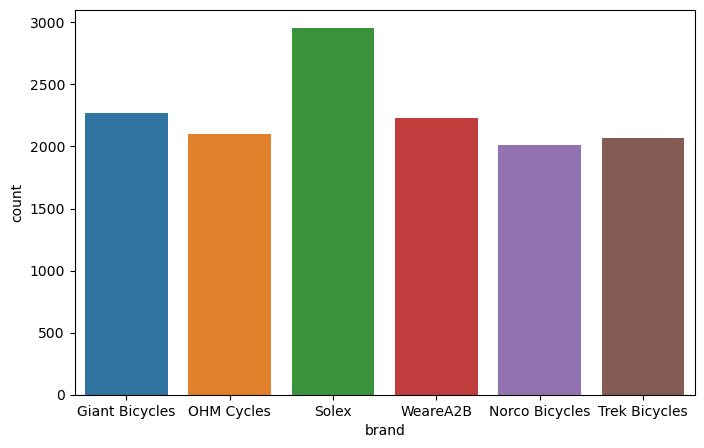

In [35]:
'''''
fig=plt.figure(figsize=(5,5))
plt.pie(data,labels=label)
'''''
fig=plt.figure(figsize=(8,5))
sns.countplot(x=df_final['brand'])

SOLEX IS THE MOST PURCHASEABLE

In [36]:
list(df_final['brand'].value_counts())

[2954, 2273, 2228, 2097, 2072, 2012]

In [37]:
list(df_final['brand'].unique())

['Giant Bicycles',
 'OHM Cycles',
 'Solex',
 'WeareA2B',
 'Norco Bicycles',
 'Trek Bicycles']

In [38]:
df_final['list_price']=df_final['list_price'].apply(lambda x:x.split('$')[1])

df_final['list_price']=df_final['list_price'].str.replace(',','').astype(float)

In [39]:
df_final['standard_cost']=df_final['standard_cost'].apply(lambda x:x.split('$')[1])


df_final['standard_cost']=df_final['standard_cost'].str.replace(',','').astype(float)

In [40]:
df_final['list_price']

0         590.26
1        1280.28
2        1635.30
3         227.88
4         478.16
          ...   
13631    2005.66
13632    1057.51
13633     441.49
13634    2091.47
13635    1216.14
Name: list_price, Length: 13636, dtype: float64

<Axes: xlabel='product_line', ylabel='count'>

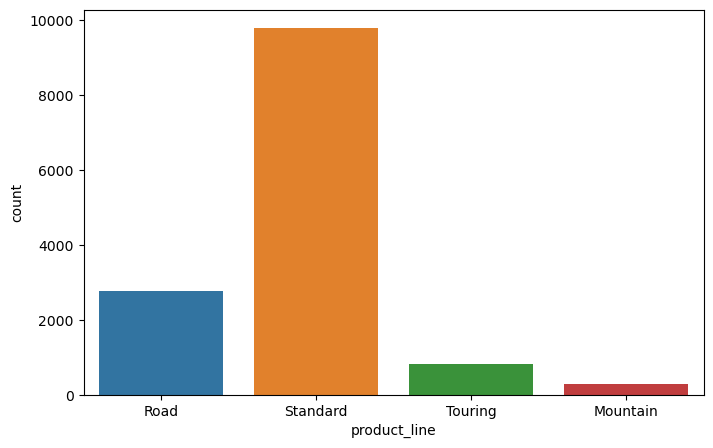

In [41]:
fig=plt.figure(figsize=(8,5))
sns.countplot(x=df_final['product_line'])

Standard products are purchased most

<Axes: xlabel='product_class', ylabel='count'>

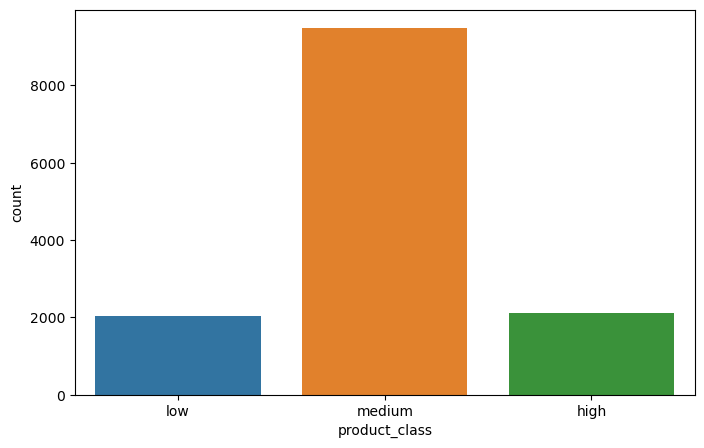

In [42]:
#
fig=plt.figure(figsize=(8,5))
sns.countplot(x=df_final['product_class'])

<Axes: xlabel='product_size', ylabel='count'>

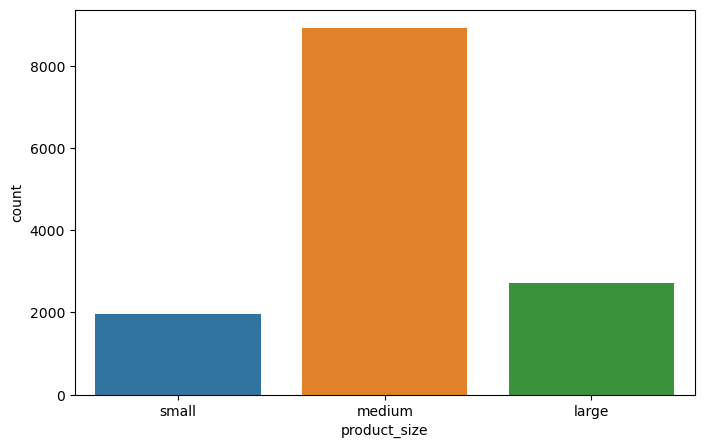

In [43]:
fig=plt.figure(figsize=(8,5))
sns.countplot(x=df_final['product_size'])

MEDIUM QUALITY PRODUCTS AND MEDIUM SIZED PRODUCTS ARE PURCHASES THE MOST

<Axes: xlabel='brand', ylabel='standard_cost'>

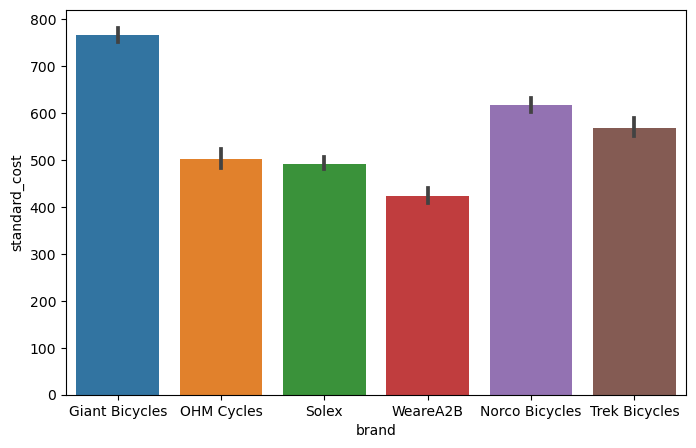

In [44]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x=df_final['brand'],y=df_final['standard_cost'])

Giant Bicycles are costliest brand while WeareA2B is cheapest. OHM Cycles and Soles are moderate and hence are most purchased

<Axes: xlabel='brand', ylabel='standard_cost'>

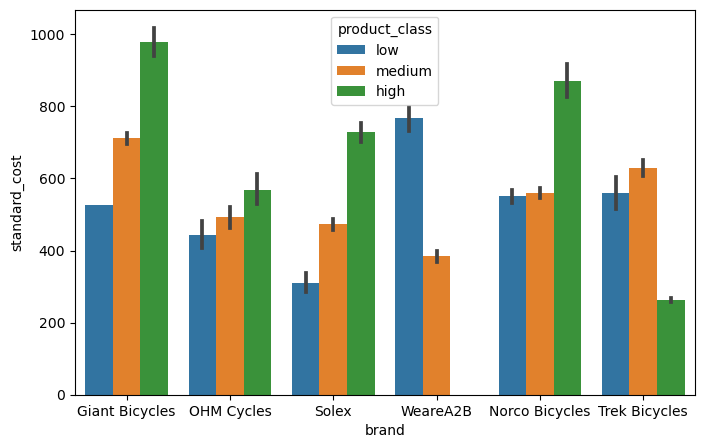

In [45]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x=df_final['brand'],y=df_final['standard_cost'],hue=df_final['product_class'])

WearA2B does not sell high quality products they have more sold in low quality products. Giant bicycles is costly for every class product

<Axes: xlabel='brand', ylabel='standard_cost'>

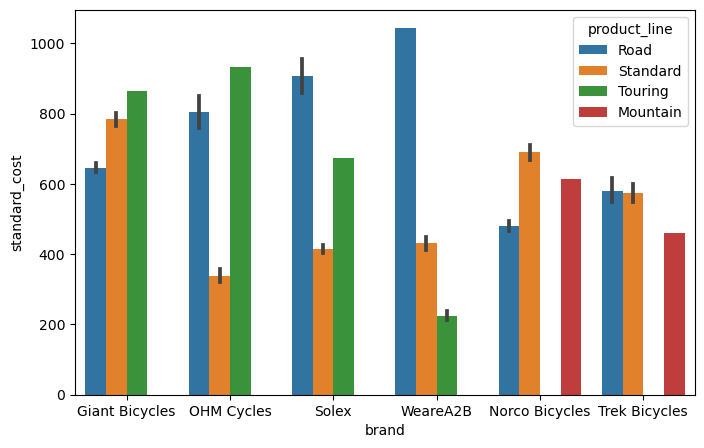

In [46]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x=df_final['brand'],y=df_final['standard_cost'],hue=df_final['product_line'])

MOUNTAIN PRODUCT_LINE PRODUCTS ARE MOSTLY COSTLY FROM NORCO BICYCLES AND TREK BICYCLES WHILE TOURING PRODUCT_LINE PRODUCTS
ARE MOSTLY COSTLY FROM OHM CYCLES AND GIANT BICYCLES AND ROAD PRODUCT_LINE ARE MOST COSTLY FROM WEARA2B

<Axes: xlabel='brand', ylabel='count'>

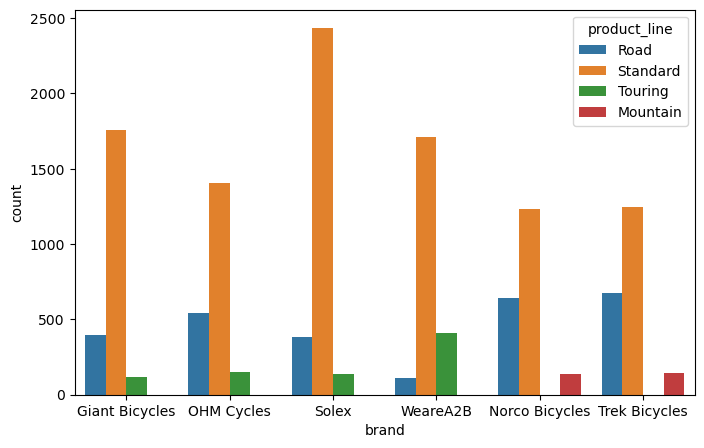

In [47]:
fig=plt.figure(figsize=(8,5))
sns.countplot(x=df_final['brand'],hue=df_final['product_line'])

 THIS INDICATES THAT SOLEX BRAND IS MOSTLY PURCHASED FOR STANDARD PRODUCT_LINE FOLLOWED BY GIANT BICYCLE AND WEAREA2B,
    ROAD PRODUCT_LINE IS GOOD FOR NORCO BICYCLES AND TREK BICYCLES WHILE TOURING PRODUCTS ARE BEST PURCHASED FROM WEARE2B

<Axes: xlabel='product_class', ylabel='standard_cost'>

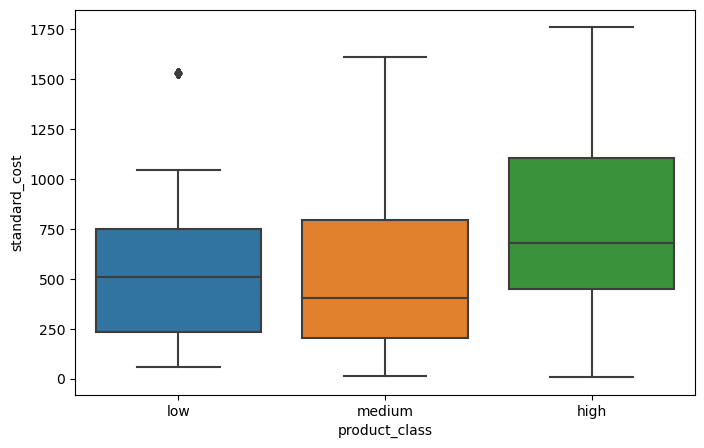

In [48]:
fig=plt.figure(figsize=(8,5))
sns.boxplot(x=df_final['product_class'],y=df_final['standard_cost'])

low and medium class products have approximately same cost

<Axes: xlabel='product_size', ylabel='standard_cost'>

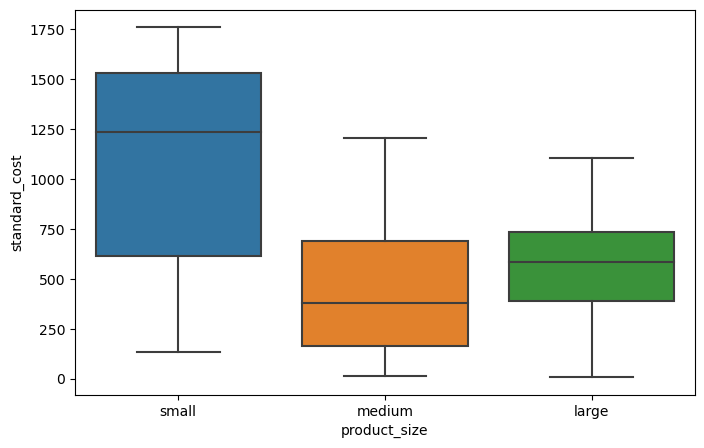

In [49]:
fig=plt.figure(figsize=(8,5))
sns.boxplot(x=df_final['product_size'],y=df_final['standard_cost'])

SMALL SIZE PRODUCTS ARE MOST COSTLY. MEDIUM SIZE PRODUCTS HAS WIDER COST RANGE THAN LARGE SIZE COST 

<Axes: xlabel='product_class', ylabel='standard_cost'>

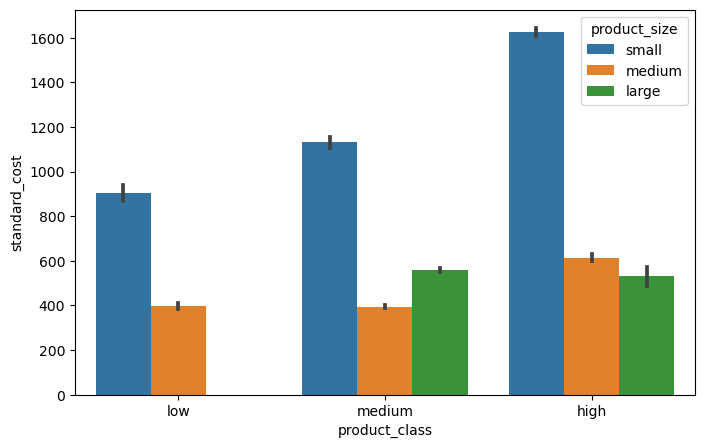

In [50]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x=df_final['product_class'],y=df_final['standard_cost'],hue=df_final['product_size'])

--> small size products are most costly in any class. 
--> In 'low' product_class we don't sell large size products


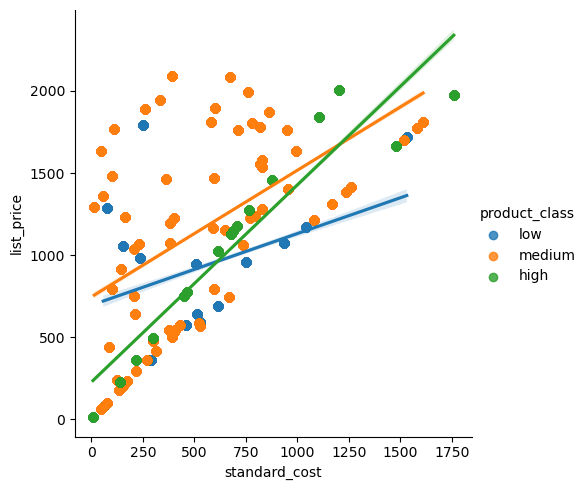

In [51]:
sns.lmplot(x='standard_cost',y='list_price',data=df_final,hue='product_class')

list_price and standard_cost mostly varies in case of medium and low quality class while in 
case of high product class the difference is less

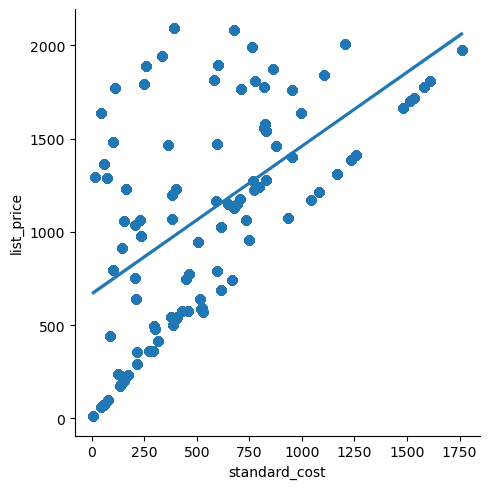

In [52]:
sns.lmplot(x='standard_cost',y='list_price',data=df_final)

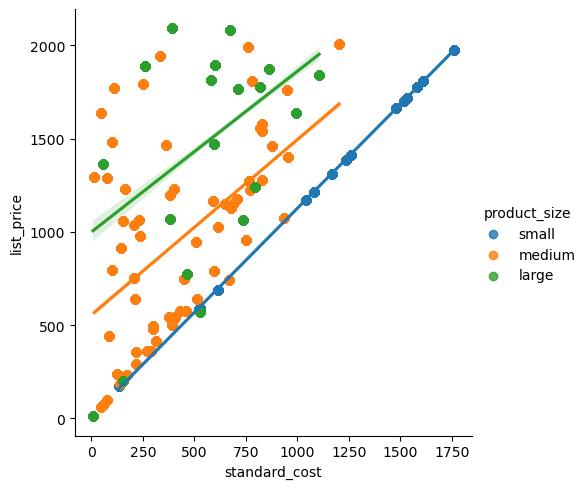

In [53]:
sns.lmplot(x='standard_cost',y='list_price',data=df_final,hue='product_size')

list_price and standard_cost mostly varies in case of medium and large size prducts while less in case of small sizes product
 the difference is less

In [54]:
df_final.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       30-12-2017        False   
1           12070          58         3123       06-04-2017         True   
2           11870          96         3123       07-02-2017         True   
3           17559           0         3123       10-01-2017         True   
4             411          62         3355       30-12-2017        False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved  Giant Bicycles         Road           low        small  ...   
1     Approved      OHM Cycles         Road        medium       medium  ...   
2     Approved  Giant Bicycles     Standard        medium        large  ...   
3     Approved      OHM Cycles     Standard          high       medium  ...   
4     Approved           Solex     Standard        medium       medium  ...   

          job_title  job_industry_category  wealth_segment deceased_indicator  \
0  Dental Hygienist                 Health  High Net Worth                  N   
1  Dental Hygienist                 Health  High Net Worth                  N   
2  Dental Hygienist                 Health  High Net Worth                  N   
3  Dental Hygienist                 Health  High Net Worth                  N   
4  Staff Accountant          Manufacturing   Mass Customer                  N   

  owns_car  tenure              address postcode state property_valuation  
0       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
1       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
2       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
3       No    20.0  6915 Nobel Crossing     2195   NSW                  6  
4       No     3.0     45 Talisman Pass     4102   QLD                  4  

[5 rows x 27 columns]

In [55]:
df_final['wealth_segment'].value_counts()
#df_final['wealth_segment'].unique()

Mass Customer        6775
High Net Worth       3468
Affluent Customer    3393
Name: wealth_segment, dtype: int64

In [56]:
fig=px.pie(df_final,values=list(df_final['wealth_segment'].value_counts()),names=['Mass Customer','High Net Worth','Affluent Customer'] )
fig.show()

MASS CUSTOMERS --> Mass customers, also known as mass-market customers or the general public, 
refer to a large group of consumers who share common characteristics and purchasing behaviors. 
These customers are not defined by specific demographic factors such as age, gender, or income level,
but rather by their broad appeal and widespread presence in the market.


Affluent customers --> the affluent segment, refer to individuals or households with a high level of 
financial resources and disposable income. 

MASS CUSTOMERS category of wealth segment has most proportion of purchase

In [57]:
fig = px.pie(df_final, values=list(df_final['job_industry_category'].value_counts()), names=list(pd.DataFrame(df_final['job_industry_category'].value_counts()).index))
fig.show()

MANUFACTURING,FINANCIAL SERVICES AND HEALTH SECTORS ARE OUR MAIN SECTOR CUSTOMERS

<Axes: xlabel='job_industry_category', ylabel='count'>

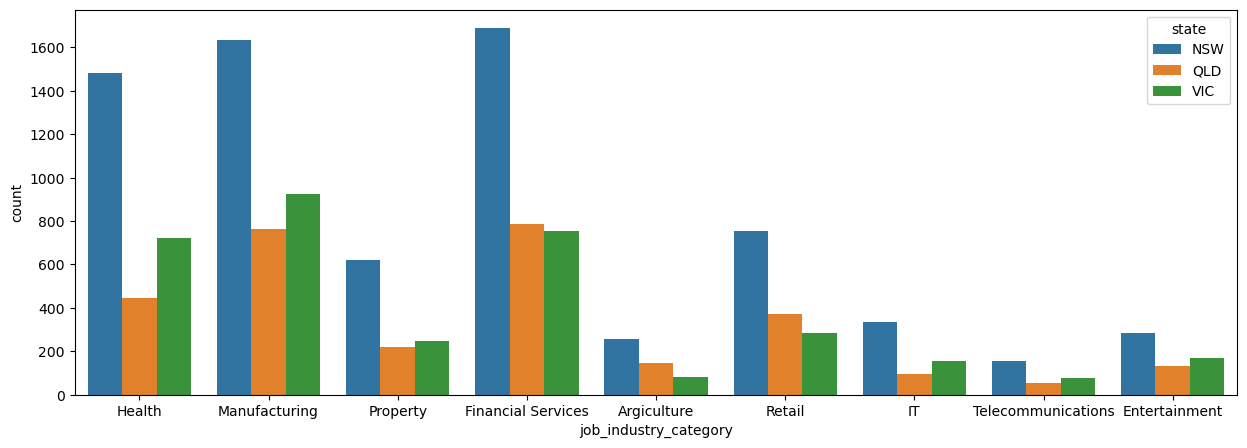

In [58]:
fig=plt.figure(figsize=(15,5))

sns.countplot(x=df_final['job_industry_category'],hue=df_final['state'])

<Axes: xlabel='job_industry_category', ylabel='standard_cost'>

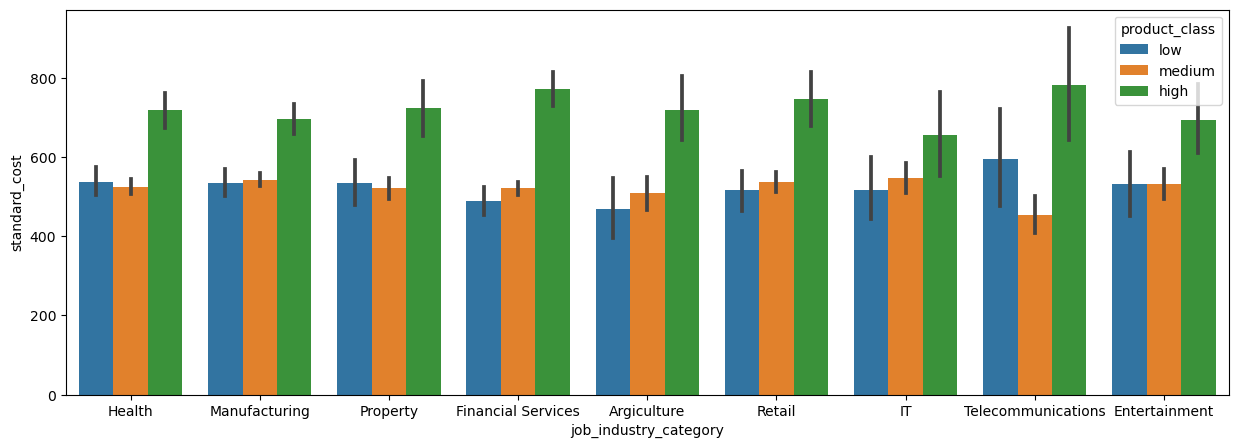

In [59]:

fig=plt.figure(figsize=(15,5))

sns.barplot(x=df_final['job_industry_category'],y=df_final['standard_cost'],hue=df_final['product_class'])

<Axes: xlabel='job_industry_category', ylabel='standard_cost'>

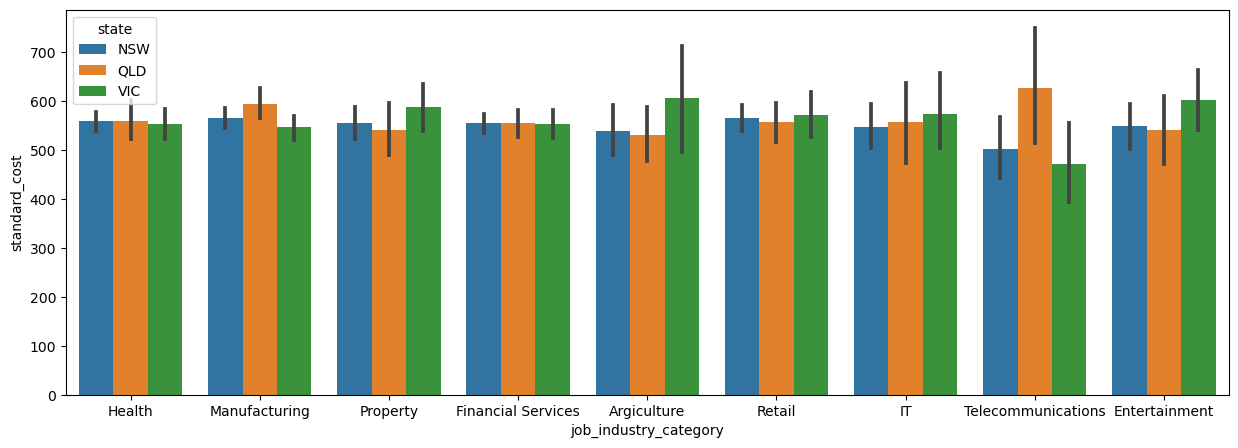

In [60]:

fig=plt.figure(figsize=(15,5))

sns.barplot(x=df_final['job_industry_category'],y=df_final['standard_cost'],hue=df_final['state'])

<Axes: xlabel='brand', ylabel='count'>

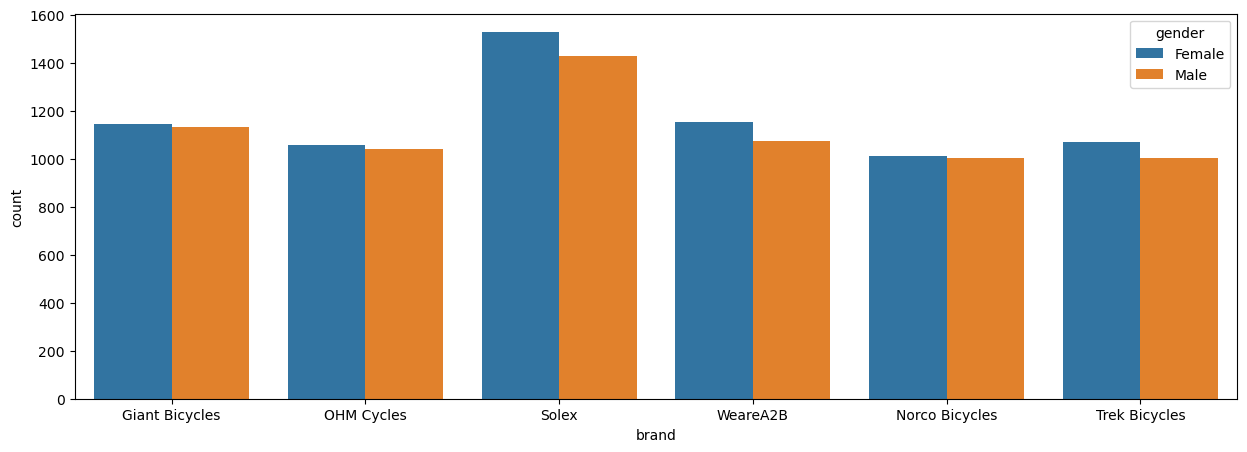

In [61]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x=df_final['brand'],hue=df_final['gender'])

<Axes: xlabel='product_line', ylabel='count'>

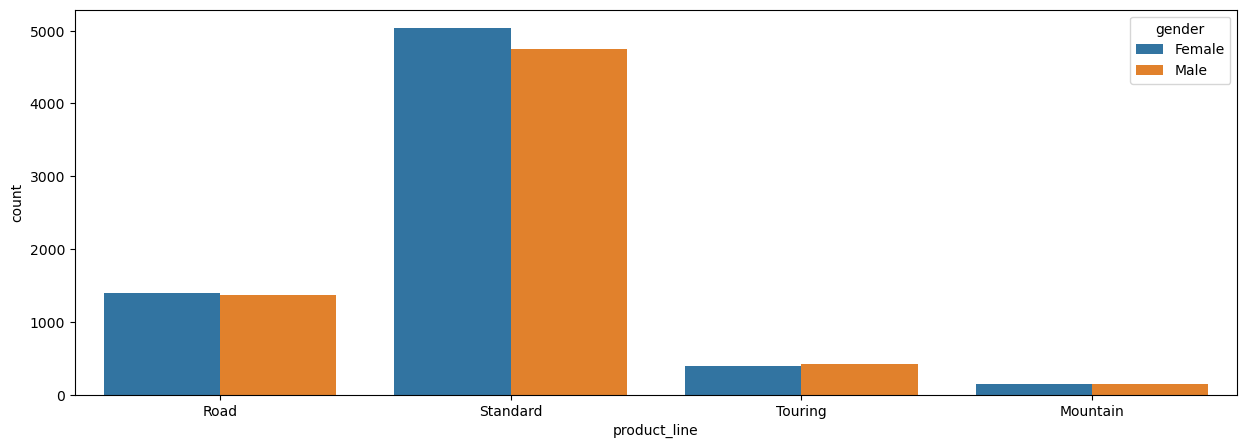

In [62]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x=df_final['product_line'],hue=df_final['gender'])

THESE GRAPHS INDICATE THAT THERE IS NO SPECIFIC BRAND OR PRODUCT LINE RELATED TO CUSTOMERS

In [63]:
df_final['DOB']

0        1976-08-17
1        1976-08-17
2        1976-08-17
3        1976-08-17
4        1990-02-19
            ...    
13631    1974-10-23
13632    1963-08-22
13633    1978-12-18
13634    1966-11-28
13635    1957-06-18
Name: DOB, Length: 13636, dtype: object

In [64]:
from datetime import datetime
'''''
datetime_str = '09/19/22 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
'''''
df_final['DOB']= df_final['DOB'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
df_final['transaction_date']=df_final['transaction_date'].apply(lambda x: datetime.strptime(x,'%d-%m-%Y'))

In [65]:
from dateutil import relativedelta

df_final['Age']=df_final['DOB'].apply(lambda x:(relativedelta.relativedelta(datetime.strptime('2021-01-1','%Y-%m-%d'),x)).years)

In [66]:
len(df_final[df_final['Age']<=30])

2642

In [67]:
-len(df_final[ (df_final['Age']>30)  & (df_final['Age']<=55) ])

-8422

In [68]:
len(df_final[(df_final['Age']>55)])

2572

In [69]:
def age_cat(x):
    if x<=30:
        return 'youth'
    elif x>30 and x<=55:
        return 'adult'
    else:
        return 'senior citizen'

df_final['age_group']=df_final['Age'].apply(lambda x:age_cat(x))

In [70]:
fig=px.pie(values=df_final['age_group'].value_counts(),names=list(pd.DataFrame(df_final['age_group'].value_counts()).index))
fig.show()

AGE GROUP 31 TO 50 i.e ADULT PEOPLE DO MORE PURCHASE

<Axes: xlabel='state', ylabel='count'>

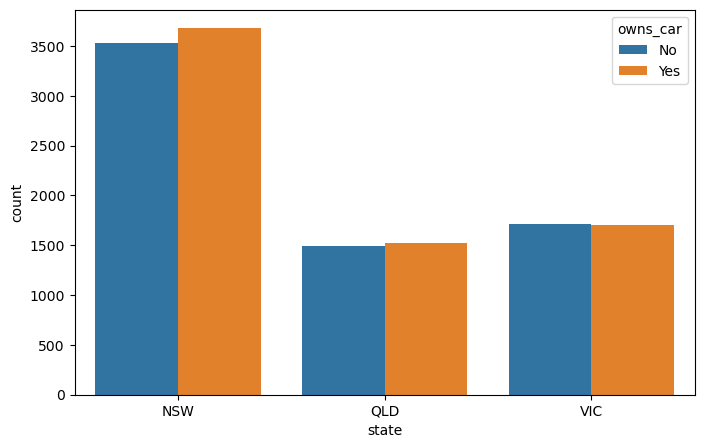

In [71]:
fig=plt.figure(figsize=(8,5))
sns.countplot(x=df_final['state'],hue=df_final['owns_car'])

<Axes: xlabel='job_industry_category', ylabel='past_3_years_bike_related_purchases'>

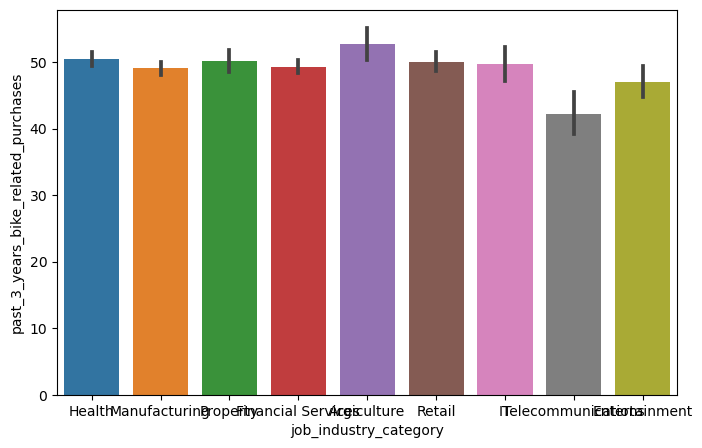

In [72]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x=df_final['job_industry_category'],y=df_final['past_3_years_bike_related_purchases'])

<Axes: xlabel='owns_car', ylabel='past_3_years_bike_related_purchases'>

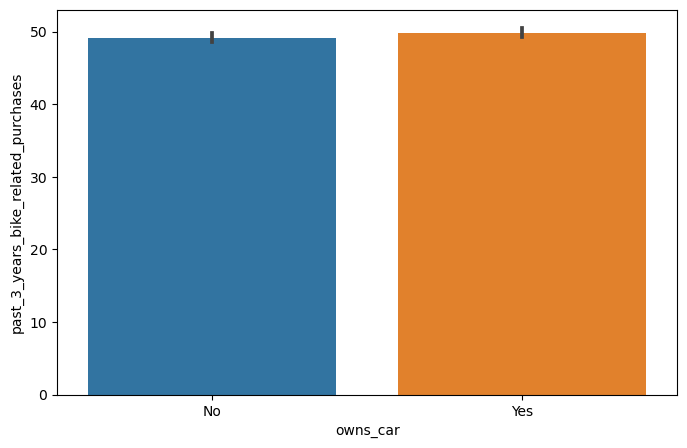

In [73]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x=df_final['owns_car'],y=df_final['past_3_years_bike_related_purchases'])

In [74]:
df_final['job_title'].value_counts().head(10)

Social Worker               215
Nuclear Power Engineer      190
Chemical Engineer           182
Internal Auditor            182
Clinical Specialist         180
Assistant Media Planner     173
Legal Assistant             172
Computer Systems Analyst    171
Research Nurse              170
Registered Nurse            168
Name: job_title, dtype: int64

In [75]:
fig=px.pie(values=df_final['state'].value_counts(),names=list(pd.DataFrame(df_final['state'].value_counts()).index))
fig.show()

OUR MAJOR CUSTOMERS ARE FROM NORTH SOUTH WALES

In [76]:
fig=px.pie(values=df_final['property_valuation'].value_counts(),names=list(pd.DataFrame(df_final['property_valuation'].value_counts()).index))
fig.show()

CUSTOMERS WITH PROPERTY EVALUATION WITH 8,9,7,10 ARE OUR MAJOR CUSTOMERS

C:\Users\lenovo\AppData\Local\Temp\ipykernel_28724\4054925313.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

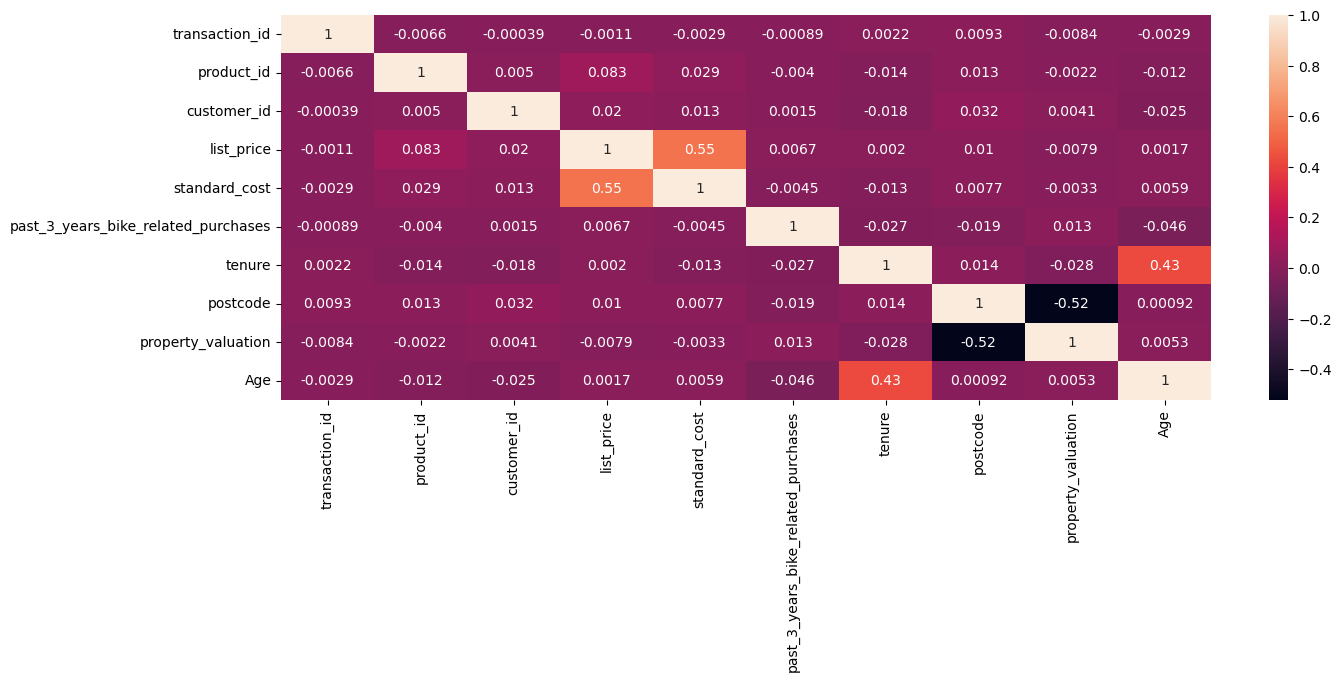

In [77]:
fig=plt.figure(figsize=(15,5))
sns.heatmap(df_final.corr(),annot=True)

In [78]:
df_final.groupby('brand')['standard_cost'].describe()

count        mean         std     min     25%     50%  \
brand                                                                    
Giant Bicycles  2273.0  765.181549  360.412579  173.18  582.48  709.48   
Norco Bicycles  2012.0  617.522018  322.176196  206.35  376.84  521.94   
OHM Cycles      2097.0  502.433109  491.483636    7.21  101.58  248.82   
Solex           2954.0  491.751256  363.385946   53.62  151.96  448.90   
Trek Bicycles   2072.0  568.771515  438.134510  154.40  297.43  388.92   
WeareA2B        2228.0  423.747617  376.267299   13.44  131.92  260.14   

                   75%      max  
brand                            
Giant Bicycles  954.82  1759.85  
Norco Bicycles  795.10  1479.11  
OHM Cycles      874.90  1610.90  
Solex           675.03  1516.13  
Trek Bicycles   598.76  1580.47  
WeareA2B        762.63  1259.36

In [79]:
df_final.groupby('product_line')['standard_cost'].describe()

count        mean         std     min     25%     50%     75%  \
product_line                                                                   
Mountain       285.0  533.876526   76.681451  459.71  459.71  459.71  612.88   
Road          2753.0  675.246291  435.147180    7.21  376.84  594.68  829.51   
Standard      9786.0  528.604974  407.227919   13.44  161.60  431.45  764.96   
Touring        812.0  525.265443  323.144233   57.74  260.14  363.25  863.95   

                  max  
product_line           
Mountain       612.88  
Road          1610.90  
Standard      1759.85  
Touring        933.84

In [80]:
df_final.groupby('product_size')['standard_cost'].describe()

count         mean         std     min     25%      50%  \
product_size                                                             
large         2730.0   555.443033  283.221021    7.21  388.92   582.48   
medium        8933.0   430.409751  299.748900   13.44  161.60   376.84   
small         1973.0  1140.061774  473.517492  131.92  612.88  1234.29   

                  75%      max  
product_size                    
large          733.58  1105.75  
medium         689.18  1203.40  
small         1531.42  1759.85

In [81]:
df_time_series=df_final[['transaction_date','list_price','standard_cost']]

In [82]:
df_time_series.head()

transaction_date  list_price  standard_cost
0       2017-12-30      590.26         525.33
1       2017-04-06     1280.28         829.51
2       2017-02-07     1635.30         993.66
3       2017-01-10      227.88         136.73
4       2017-12-30      478.16         298.72

In [83]:
df_time_series=df_time_series.set_index('transaction_date')

In [84]:
df_time_series.head()

list_price  standard_cost
transaction_date                           
2017-12-30            590.26         525.33
2017-04-06           1280.28         829.51
2017-02-07           1635.30         993.66
2017-01-10            227.88         136.73
2017-12-30            478.16         298.72

In [85]:
df_time_series["-12-2017"].head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_28724\1920884492.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



list_price  standard_cost
transaction_date                           
2017-12-30            590.26         525.33
2017-12-30            478.16         298.72
2017-12-30            495.72         297.43
2017-12-30           1469.44         596.55
2017-12-12           1842.92        1105.75

In [86]:
df_time_series["2017"].mean()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_28724\3260196114.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



list_price       1110.372482
standard_cost     558.122006
dtype: float64

STANDARD PRICE IS ALMOST HALF OF LIST_PRICE

<Axes: xlabel='transaction_date'>

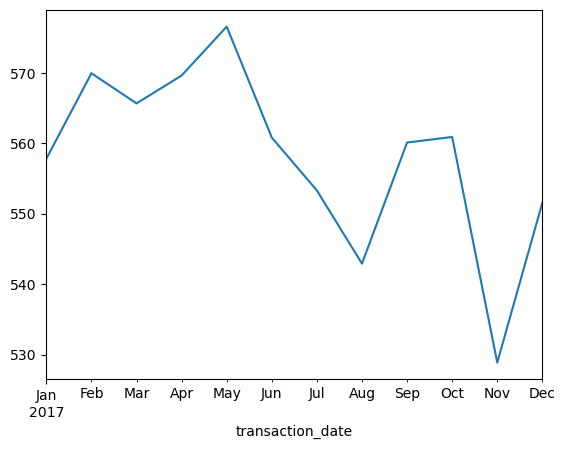

In [87]:
#df.Close.resample('M').mean().plot()
df_time_series.standard_cost.resample('M').mean().plot()

THIS INDICATES THAT OUR PRICE HAD GONE UP IN MAY MONTH WHICH HAS SUDDENLY FALL DOWN DURING AUGUST AND THEN IN NOVEMBER BUT HAS 
STARTED RISING UP AGAIN IN DECEMBER

<Axes: xlabel='transaction_date'>

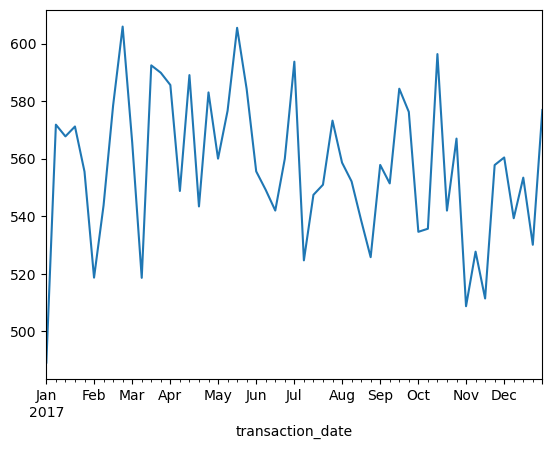

In [88]:
df_time_series.standard_cost.resample('W').mean().plot()

<Axes: xlabel='transaction_date'>

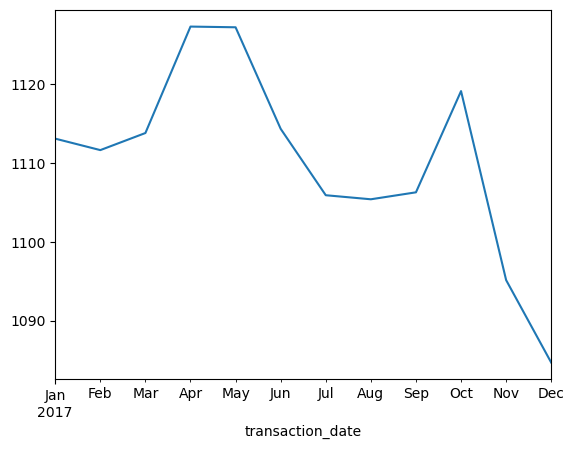

In [89]:
df_time_series.list_price.resample('M').mean().plot()

MANUFACTURE NEED TO TAKE CARE AS THERE AS LIST_PRICE ARE DECLINING!

In [90]:
df_final['profit']=df_final['list_price']-df_final['standard_cost']

In [91]:
df_final.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       2017-12-30        False   
1           12070          58         3123       2017-04-06         True   
2           11870          96         3123       2017-02-07         True   
3           17559           0         3123       2017-01-10         True   
4             411          62         3355       2017-12-30        False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved  Giant Bicycles         Road           low        small  ...   
1     Approved      OHM Cycles         Road        medium       medium  ...   
2     Approved  Giant Bicycles     Standard        medium        large  ...   
3     Approved      OHM Cycles     Standard          high       medium  ...   
4     Approved           Solex     Standard        medium       medium  ...   

   deceased_indicator  owns_car tenure              address postcode  state  \
0                   N        No   20.0  6915 Nobel Crossing     2195    NSW   
1                   N        No   20.0  6915 Nobel Crossing     2195    NSW   
2                   N        No   20.0  6915 Nobel Crossing     2195    NSW   
3                   N        No   20.0  6915 Nobel Crossing     2195    NSW   
4                   N        No    3.0     45 Talisman Pass     4102    QLD   

  property_valuation Age age_group  profit  
0                  6  44     adult   64.93  
1                  6  44     adult  450.77  
2                  6  44     adult  641.64  
3                  6  44     adult   91.15  
4                  4  30     youth  179.44  

[5 rows x 30 columns]

In [92]:
df_final[df_final['profit']>0]

transaction_id  product_id  customer_id transaction_date online_order  \
0                 253           2         3123       2017-12-30        False   
1               12070          58         3123       2017-04-06         True   
2               11870          96         3123       2017-02-07         True   
3               17559           0         3123       2017-01-10         True   
4                 411          62         3355       2017-12-30        False   
...               ...         ...          ...              ...          ...   
13631            5379          25          822       2017-02-05        False   
13632            8765          35         1544       2017-02-04         True   
13633            7263          45         1846       2017-01-31        False   
13634            1616           3         3040       2017-01-19         True   
13635           13977          28         2807       2017-01-11         True   

      order_status           brand product_line product_class product_size  \
0         Approved  Giant Bicycles         Road           low        small   
1         Approved      OHM Cycles         Road        medium       medium   
2         Approved  Giant Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard          high       medium   
4         Approved           Solex     Standard        medium       medium   
...            ...             ...          ...           ...          ...   
13631     Approved      OHM Cycles     Standard          high       medium   
13632     Approved   Trek Bicycles     Standard           low       medium   
13633     Approved           Solex     Standard        medium       medium   
13634    Cancelled   Trek Bicycles     Standard        medium        large   
13635     Approved  Norco Bicycles     Standard        medium        small   

       ...  deceased_indicator  owns_car tenure                address  \
0      ...                   N        No   20.0    6915 Nobel Crossing   
1      ...                   N        No   20.0    6915 Nobel Crossing   
2      ...                   N        No   20.0    6915 Nobel Crossing   
3      ...                   N        No   20.0    6915 Nobel Crossing   
4      ...                   N        No    3.0       45 Talisman Pass   
...    ...                 ...       ...    ...                    ...   
13631  ...                   N        No   17.0    659 Scofield Street   
13632  ...                   N       Yes   11.0   16 Maple Wood Center   
13633  ...                   N        No    7.0        8 Hoffman Alley   
13634  ...                   N        No    5.0         1 Melrose Lane   
13635  ...                   N       Yes   11.0  441 Superior Junction   

      postcode  state property_valuation Age       age_group   profit  
0         2195    NSW                  6  44           adult    64.93  
1         2195    NSW                  6  44           adult   450.77  
2         2195    NSW                  6  44           adult   641.64  
3         2195    NSW                  6  44           adult    91.15  
4         4102    QLD                  4  30           youth   179.44  
...        ...    ...                ...  ..             ...      ...  
13631     3175    VIC                  5  46           adult   802.26  
13632     2155    NSW                 10  57  senior citizen   903.11  
13633     3181    VIC                 10  42           adult   356.50  
13634     2010    NSW                  9  54           adult  1702.55  
13635     2320    NSW                  6  63  senior citizen   133.78  

[13636 rows x 30 columns]

<Axes: xlabel='brand', ylabel='profit'>

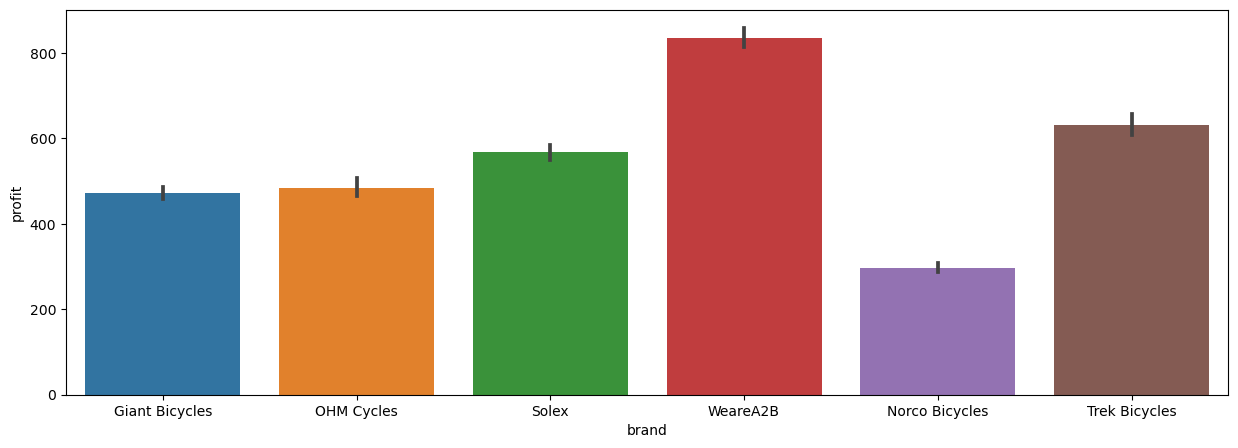

In [93]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=df_final['brand'],y=df_final['profit'])

WEARA2B EARNS HIGHEST AMOUNT OF PROFIT

<Axes: xlabel='brand', ylabel='profit'>

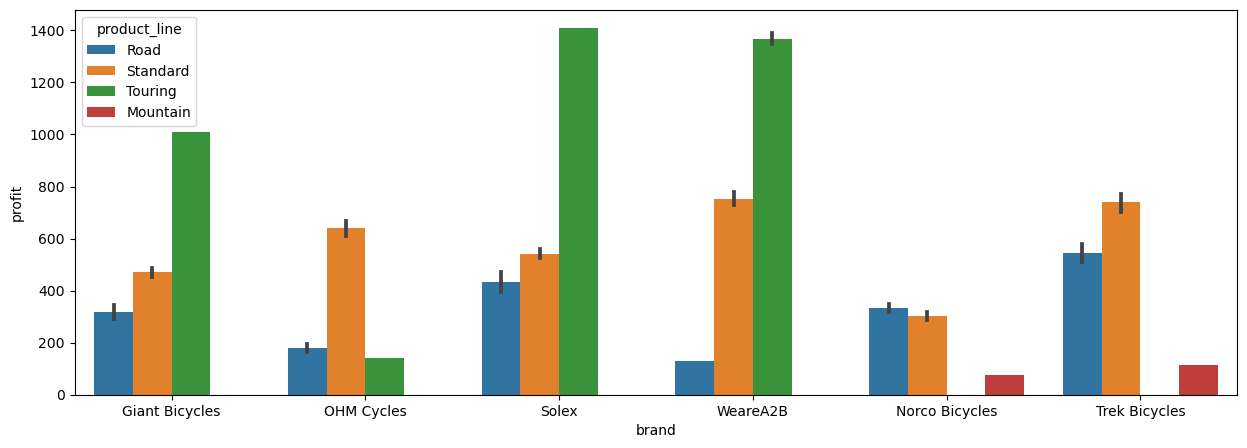

In [94]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=df_final['brand'],y=df_final['profit'],hue=df_final['product_line'])

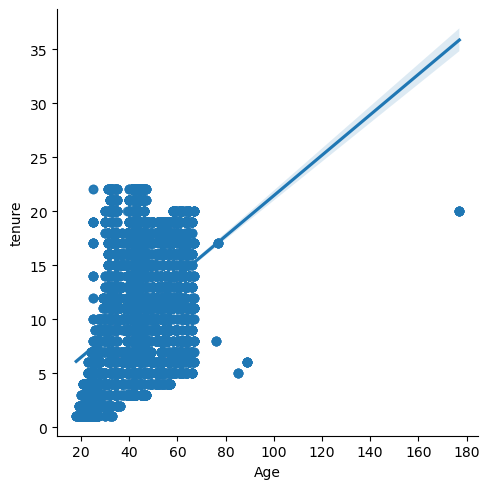

In [232]:
sns.lmplot(x='Age',y='tenure',data=df_final)

In [233]:
df_final['postcode'].value_counts()

2153    108
2155    103
2166     96
2170     89
4300     88
       ... 
2441      2
3060      1
2850      1
3818      1
3169      1
Name: postcode, Length: 750, dtype: int64

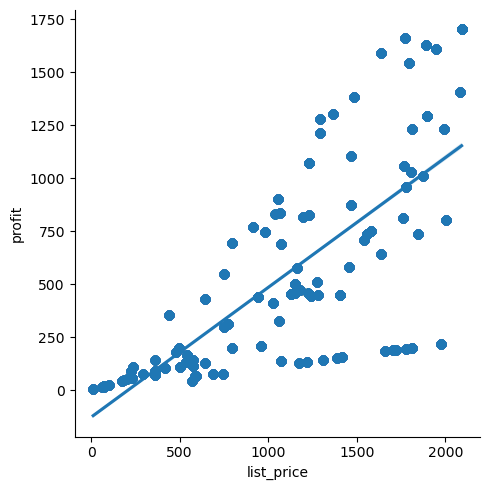

In [95]:
sns.lmplot(x='list_price',y='profit',data=df_final)

THIS SHOWS THE LINEAR RELATION OF LIST_PRICE WITH PROFIT

<Axes: xlabel='transaction_date'>

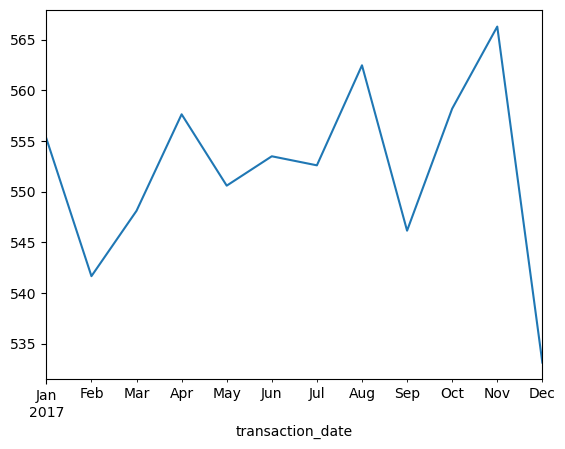

In [96]:
df_time_series['profit']=df_time_series['list_price']-df_time_series['standard_cost']
df_time_series.profit.resample('M').mean().plot()

<Axes: xlabel='transaction_date'>

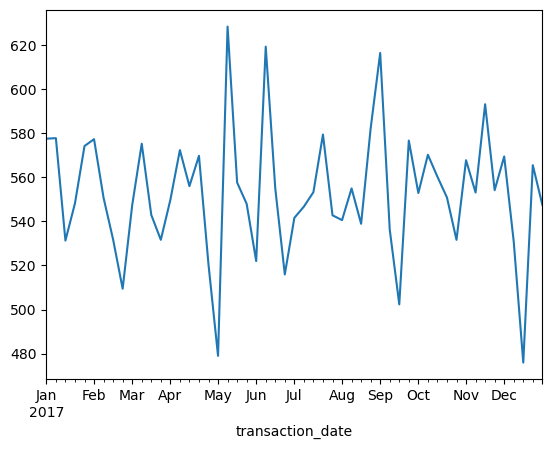

In [97]:
df_time_series.profit.resample('W').mean().plot()

FOR A GODD BUSINESS PROFIT MUST ALWAYS BE AN INCREADING CURVE WE HAD LEAST AMOUNT OF PROFIT IN MAY AND DECEMBER AFTER WHICH IT INCREASED AND NOW IT IS DECREASING WHICH IS NOT A GOOD SIGN!

In [98]:
df_final.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation', 'Age', 'age_group', 'profit'],
      dtype='object')

In [99]:
df_time_series.head()

list_price  standard_cost  profit
transaction_date                                   
2017-12-30            590.26         525.33   64.93
2017-04-06           1280.28         829.51  450.77
2017-02-07           1635.30         993.66  641.64
2017-01-10            227.88         136.73   91.15
2017-12-30            478.16         298.72  179.44

In [100]:
df_time_series['2017-12']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_28724\4245803958.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



list_price  standard_cost  profit
transaction_date                                   
2017-12-30            590.26         525.33   64.93
2017-12-30            478.16         298.72  179.44
2017-12-30            495.72         297.43  198.29
2017-12-30           1469.44         596.55  872.89
2017-12-12           1842.92        1105.75  737.17
...                      ...            ...     ...
2017-12-01            230.91         173.18   57.73
2017-12-01            533.51         400.13  133.38
2017-12-01           1458.17         874.90  583.27
2017-12-01             60.34          45.26   15.08
2017-12-01           1065.03         230.09  834.94

[1135 rows x 3 columns]

In [101]:
df_final['recency']=df_final['transaction_date'].apply(lambda x:(relativedelta.relativedelta(datetime.strptime('2017-12-30','%Y-%m-%d'),x)).days)




In [102]:
df_final.head()

transaction_id  product_id  customer_id transaction_date online_order  \
0             253           2         3123       2017-12-30        False   
1           12070          58         3123       2017-04-06         True   
2           11870          96         3123       2017-02-07         True   
3           17559           0         3123       2017-01-10         True   
4             411          62         3355       2017-12-30        False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved  Giant Bicycles         Road           low        small  ...   
1     Approved      OHM Cycles         Road        medium       medium  ...   
2     Approved  Giant Bicycles     Standard        medium        large  ...   
3     Approved      OHM Cycles     Standard          high       medium  ...   
4     Approved           Solex     Standard        medium       medium  ...   

   owns_car  tenure              address postcode state  property_valuation  \
0        No    20.0  6915 Nobel Crossing     2195   NSW                   6   
1        No    20.0  6915 Nobel Crossing     2195   NSW                   6   
2        No    20.0  6915 Nobel Crossing     2195   NSW                   6   
3        No    20.0  6915 Nobel Crossing     2195   NSW                   6   
4        No     3.0     45 Talisman Pass     4102   QLD                   4   

  Age age_group  profit recency  
0  44     adult   64.93       0  
1  44     adult  450.77      24  
2  44     adult  641.64      23  
3  44     adult   91.15      20  
4  30     youth  179.44       0  

[5 rows x 31 columns]

In [148]:
df_final[df_final['customer_id'] == 3]

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure, address, postcode, state, property_valuation, Age, age_group, profit, recency]
Index: []

[0 rows x 31 columns]

In [129]:
df_recency=df_final.groupby('customer_id')
df_recency=pd.DataFrame(df_recency)

In [132]:
df_recency['count_of_recency']=df_final.groupby('customer_id')['product_id'].count()

In [130]:
df_recency['sum_of_Recency']=df_final.groupby('customer_id')['recency'].sum()

In [208]:
df_recent=df_final.groupby('customer_id')['recency'].min()

In [209]:
df_recent=df_recent.reset_index()
df_recent.head()

customer_id  recency
0            1        1
1            2        6
2            9        0
3           12        6
4           13       13

In [210]:
df_recent=pd.DataFrame(df_recent)
df_recent.columns

Index(['customer_id', 'recency'], dtype='object')

In [211]:
df_recent.describe()

customer_id      recency
count  2447.000000  2447.000000
mean   1726.167552     5.079689
std    1007.184867     4.983844
min       1.000000     0.000000
25%     846.500000     1.000000
50%    1722.000000     4.000000
75%    2592.500000     7.000000
max    3497.000000    30.000000

In [212]:
def funx(x):
    if x>7:
        return 1
    elif (x<=7) & (x>5):
        return 2
    elif (x<=5) & (x>1):
        return 3
    else:
        return 4

df_recent['r_score']=df_recent['recency'].apply(lambda x:funx(x))

In [213]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  2447 non-null   int64
 1   recency      2447 non-null   int64
 2   r_score      2447 non-null   int64
dtypes: int64(3)
memory usage: 57.5 KB


In [214]:
df_recent.isna().sum()

customer_id    0
recency        0
r_score        0
dtype: int64

In [215]:
df_recent.head()

customer_id  recency  r_score
0            1        1        4
1            2        6        2
2            9        0        4
3           12        6        2
4           13       13        1

In [ ]:
df_recency['count_of_recency']=df_final.groupby('customer_id')['product_id'].count()

In [179]:
df_frequency=df_final.groupby('customer_id')['product_id'].count()

In [180]:
df_frequency=pd.DataFrame(df_frequency)

In [181]:
df_frequency=df_frequency.reset_index()

In [182]:
df_frequency.head()

customer_id  product_id
0            1          11
1            2           3
2            9           6
3           12           7
4           13           7

In [185]:
def funy(x):
    if x>7:
        return 4
    elif (x<=7) & (x>6):
        return 3
    elif (x<=6) & (x>4):
        return 2
    else:
        return 1


df_frequency['f_score']=df_frequency['product_id'].apply(lambda x:funy(x))
df_frequency.describe()

customer_id   product_id      r_score      f_score
count  2447.000000  2447.000000  2447.000000  2447.000000
mean   1726.167552     5.572538     2.164283     2.164283
std    1007.184867     2.273499     1.100798     1.100798
min       1.000000     1.000000     1.000000     1.000000
25%     846.500000     4.000000     1.000000     1.000000
50%    1722.000000     5.000000     2.000000     2.000000
75%    2592.500000     7.000000     3.000000     3.000000
max    3497.000000    14.000000     4.000000     4.000000

In [186]:
df_frequency.drop('r_score',axis=1,inplace=True)

In [187]:
df_profit=df_final.groupby('customer_id')['profit'].sum()

In [188]:
df_profit.head()

customer_id
1     3018.09
2     2226.26
9     2353.11
12    3540.03
13    4337.38
Name: profit, dtype: float64

In [189]:
df_profit=pd.DataFrame(df_profit)

In [190]:
df_profit=df_profit.reset_index()

In [191]:
df_profit.head()

customer_id   profit
0            1  3018.09
1            2  2226.26
2            9  2353.11
3           12  3540.03
4           13  4337.38

In [192]:
df_profit.describe()

customer_id        profit
count  2447.000000   2447.000000
mean   1726.167552   3077.436653
std    1007.184867   1770.315772
min       1.000000     15.080000
25%     846.500000   1796.145000
50%    1722.000000   2795.790000
75%    2592.500000   4098.400000
max    3497.000000  11668.950000

In [193]:
def funz(x):
    if x>4098.4:
        return 4
    elif (x<=4098.4) & (x>2795.79):
        return 3
    elif (x<=2795.79) & (x>1796.145):
        return 2
    else:
        return 1


df_profit['m_score']=df_profit['profit'].apply(lambda x:funz(x))


In [194]:
df_profit.head()

customer_id   profit  m_score
0            1  3018.09        3
1            2  2226.26        2
2            9  2353.11        2
3           12  3540.03        3
4           13  4337.38        4

In [205]:
df_rfm=df_recent

In [206]:
df_rfm.head()

customer_id  recency  r_score
0          NaN      NaN      NaN
1          NaN      NaN      NaN
2          NaN      NaN      NaN
3          NaN      NaN      NaN
4          NaN      NaN      NaN

In [216]:
df_ana=df_recent

In [217]:
df_ana['count_of_productid']=df_frequency['product_id']

In [225]:
df_ana.head()

customer_id  recency  r_score  count_of_productid  f_score  sum_of_profit  \
0            1        1        4                  11        4        3018.09   
1            2        6        2                   3        1        2226.26   
2            9        0        4                   6        2        2353.11   
3           12        6        2                   7        3        3540.03   
4           13       13        1                   7        3        4337.38   

   m_score  rfm  
0        3  443  
1        2  212  
2        2  422  
3        3  233  
4        4  134

In [219]:
df_ana['f_score']=df_frequency['f_score']

In [221]:
df_ana['sum_of_profit']=df_profit['profit']

In [222]:
df_ana['m_score']=df_profit['m_score']

In [224]:
df_ana['rfm']=100*df_ana['r_score']+10*df_ana['f_score']+df_ana['m_score']

In [227]:
def rfm(x):
    if x>411:
        return 'Platinium'
    elif (x<=411) & (x>311):
        return "Gold"
    elif (x<=311) & (x>211):
        return "Silver"
    else:
        return "Bronze"


df_ana['customer_title']=df_ana['rfm'].apply(lambda x:rfm(x))


df_ana['rfm'].describe()

count    2447.000000
mean      291.490396
std       115.556416
min       111.000000
25%       211.000000
50%       322.000000
75%       411.000000
max       444.000000
Name: rfm, dtype: float64

In [228]:
df_ana.head()

customer_id  recency  r_score  count_of_productid  f_score  sum_of_profit  \
0            1        1        4                  11        4        3018.09   
1            2        6        2                   3        1        2226.26   
2            9        0        4                   6        2        2353.11   
3           12        6        2                   7        3        3540.03   
4           13       13        1                   7        3        4337.38   

   m_score  rfm customer_title  
0        3  443      Platinium  
1        2  212         Silver  
2        2  422      Platinium  
3        3  233         Silver  
4        4  134         Bronze

<Axes: xlabel='customer_title', ylabel='count'>

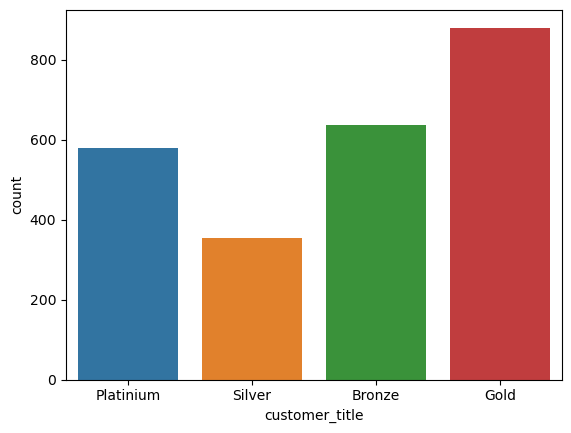

In [231]:
sns.countplot(x=df_ana['customer_title'])